<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Heart Attack Predictions <br>
    (EDA / ML / DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Heart Attack Predictions (EDA / ML / DL) (Classification)</div>**


## Goal
> ## EDA : Data Distribution, Column Analysis
> ## Modeling : Predicting Heart_Attack_Outcome

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-risk-predictions/heart_attack_predictions.csv')
df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623027 entries, 0 to 623026
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  623027 non-null  object 
 1   Age                      623027 non-null  int64  
 2   Gender                   623027 non-null  object 
 3   Cholesterol_Level        623027 non-null  float64
 4   Blood_Pressure           623027 non-null  float64
 5   Smoking_History          623027 non-null  object 
 6   Alcohol_Consumption      623027 non-null  float64
 7   Physical_Activity        623027 non-null  object 
 8   Obesity                  623027 non-null  object 
 9   Diabetes                 623027 non-null  object 
 10  Family_History           623027 non-null  object 
 11  Stress_Levels            623027 non-null  float64
 12  Dietary_Habits           623027 non-null  object 
 13  Heart_Attack_History     623027 non-null  object 
 14  Ches

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,623027.0,53.506029,20.791615,18.000000,35.000000,53.000000,72.000000,89.000000
Cholesterol_Level,623027.0,224.923182,43.272619,150.000057,187.551255,224.835733,262.426382,299.999907
Blood_Pressure,623027.0,130.008723,28.875588,80.000100,105.007014,130.036666,154.982690,179.999789
Alcohol_Consumption,623027.0,5.000483,2.888441,0.000014,2.501110,5.001672,7.497314,9.999990
Stress_Levels,623027.0,5.506905,2.598430,1.000014,3.257009,5.511778,7.758713,9.999970
Max_Heart_Rate_Achieved,623027.0,129.487062,40.424069,60.000000,94.000000,129.000000,164.000000,199.000000
HDL_Cholesterol,623027.0,60.031668,23.112245,20.000071,39.990083,60.055936,80.027313,99.999982
LDL_Cholesterol,623027.0,125.043638,43.280826,50.000057,87.571144,125.047625,162.531874,199.999924
Triglycerides,623027.0,274.857978,129.925033,50.001096,162.201635,275.026028,387.265494,499.999209
Air_Pollution_Exposure,623027.0,54.974987,25.942410,10.000151,32.547015,54.946690,77.419095,99.999881


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Country,623027,25,Indonesia,25285
Gender,623027,2,Female,311574
Smoking_History,623027,3,Former,208249
Physical_Activity,623027,3,Active,207843
Obesity,623027,2,No,311696
Diabetes,623027,2,Yes,311627
Family_History,623027,2,No,311812
Dietary_Habits,623027,3,Healthy,207896
Heart_Attack_History,623027,2,Yes,312114
Chest_Pain,623027,2,No,311776


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Country                     0.00000
Age                         0.00000
Gender                      0.00000
Cholesterol_Level           0.00000
Blood_Pressure              0.00000
Smoking_History             0.00000
Alcohol_Consumption         0.00000
Physical_Activity           0.00000
Obesity                     0.00000
Diabetes                    0.00000
Family_History              0.00000
Stress_Levels               0.00000
Dietary_Habits              0.00000
Heart_Attack_History        0.00000
Chest_Pain                  0.00000
Exercise_Induced_Angina     0.00000
Resting_ECG                 0.00000
Max_Heart_Rate_Achieved     0.00000
Thalassemia                 0.00000
HDL_Cholesterol             0.00000
LDL_Cholesterol             0.00000
Triglycerides               0.00000
Heart_Disease_Risk          0.00000
Medication_Adherence        0.00000
Urbanization_Level          0.00000
Air_Pollution_Exposure      0.00000
Access_To_Healthcare        0.00000
Education_

In [7]:
df['Education_Level'].unique()

array(['Tertiary', nan, 'Secondary', 'Primary'], dtype=object)

In [8]:
df['Education_Level'].fillna('nan', inplace=True)
df['Education_Level'].unique()

array(['Tertiary', 'nan', 'Secondary', 'Primary'], dtype=object)

In [9]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

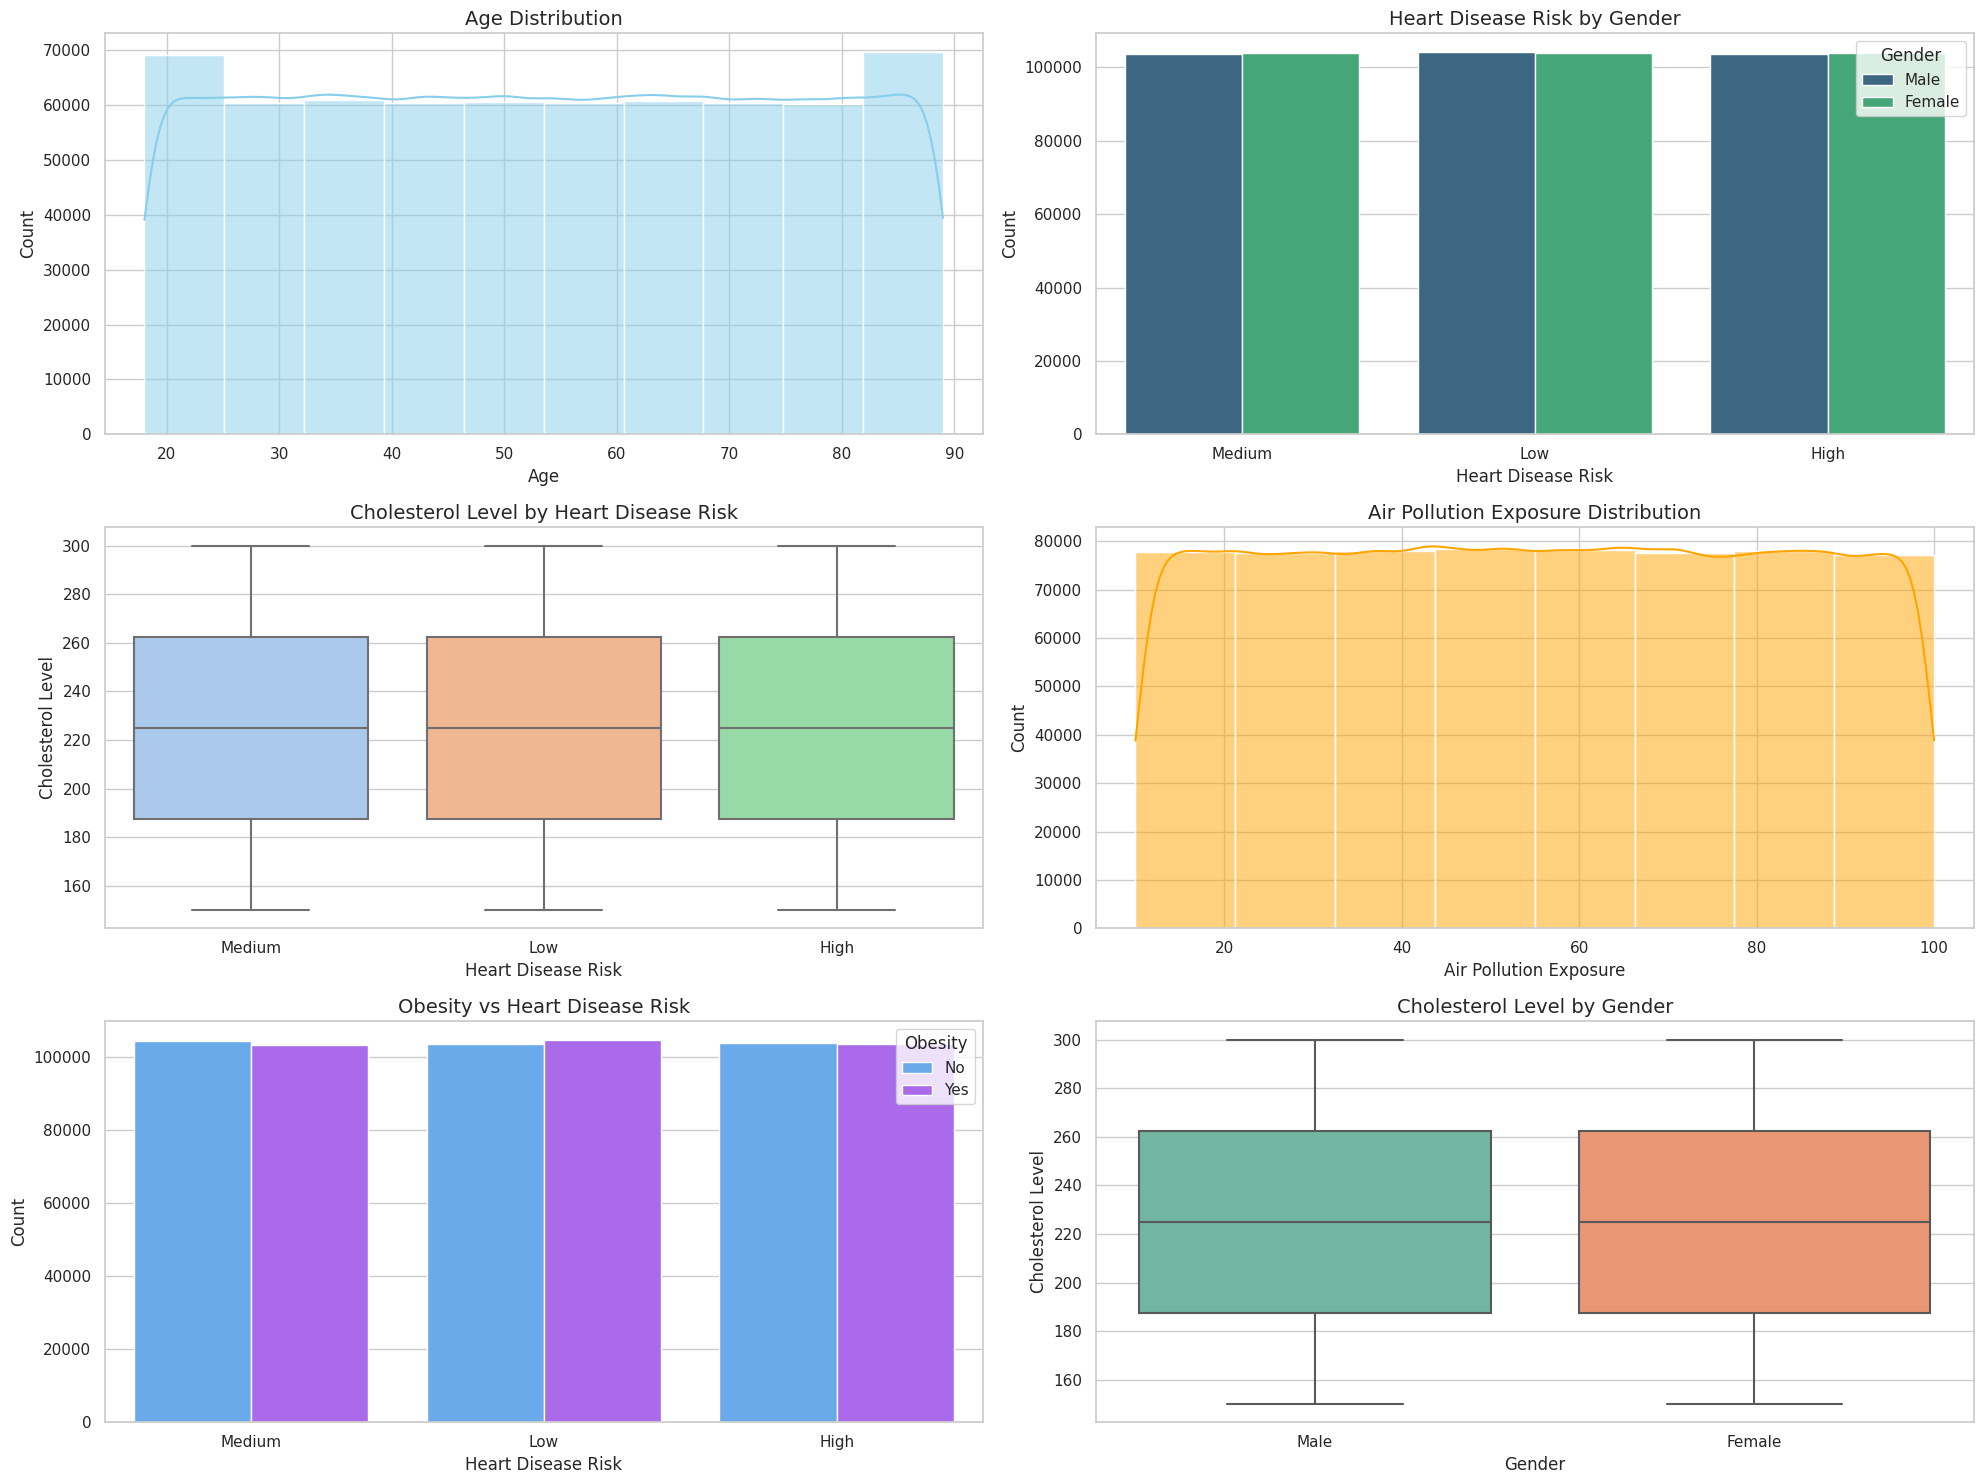

In [10]:
# Set the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# 1. Distribution of Age
plt.subplot(3, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Heart disease risk by Gender
plt.subplot(3, 2, 2)
sns.countplot(x='Heart_Disease_Risk', hue='Gender', data=df, palette='viridis')
plt.title('Heart Disease Risk by Gender', fontsize=14)
plt.xlabel('Heart Disease Risk')
plt.ylabel('Count')

# 3. Cholesterol level distribution
plt.subplot(3, 2, 3)
sns.boxplot(x='Heart_Disease_Risk', y='Cholesterol_Level', data=df, palette='pastel')
plt.title('Cholesterol Level by Heart Disease Risk', fontsize=14)
plt.xlabel('Heart Disease Risk')
plt.ylabel('Cholesterol Level')

# 4. Air pollution exposure distribution
plt.subplot(3, 2, 4)
sns.histplot(df['Air_Pollution_Exposure'], bins=8, kde=True, color='orange')
plt.title('Air Pollution Exposure Distribution', fontsize=14)
plt.xlabel('Air Pollution Exposure')
plt.ylabel('Count')

# 5. Obesity and Heart Disease Risk
plt.subplot(3, 2, 5)
sns.countplot(x='Heart_Disease_Risk', hue='Obesity', data=df, palette='cool')
plt.title('Obesity vs Heart Disease Risk', fontsize=14)
plt.xlabel('Heart Disease Risk')
plt.ylabel('Count')

# 6. Cholesterol Level by Gender
plt.subplot(3, 2, 6)
sns.boxplot(x='Gender', y='Cholesterol_Level', data=df, palette='Set2')
plt.title('Cholesterol Level by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Cholesterol Level')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

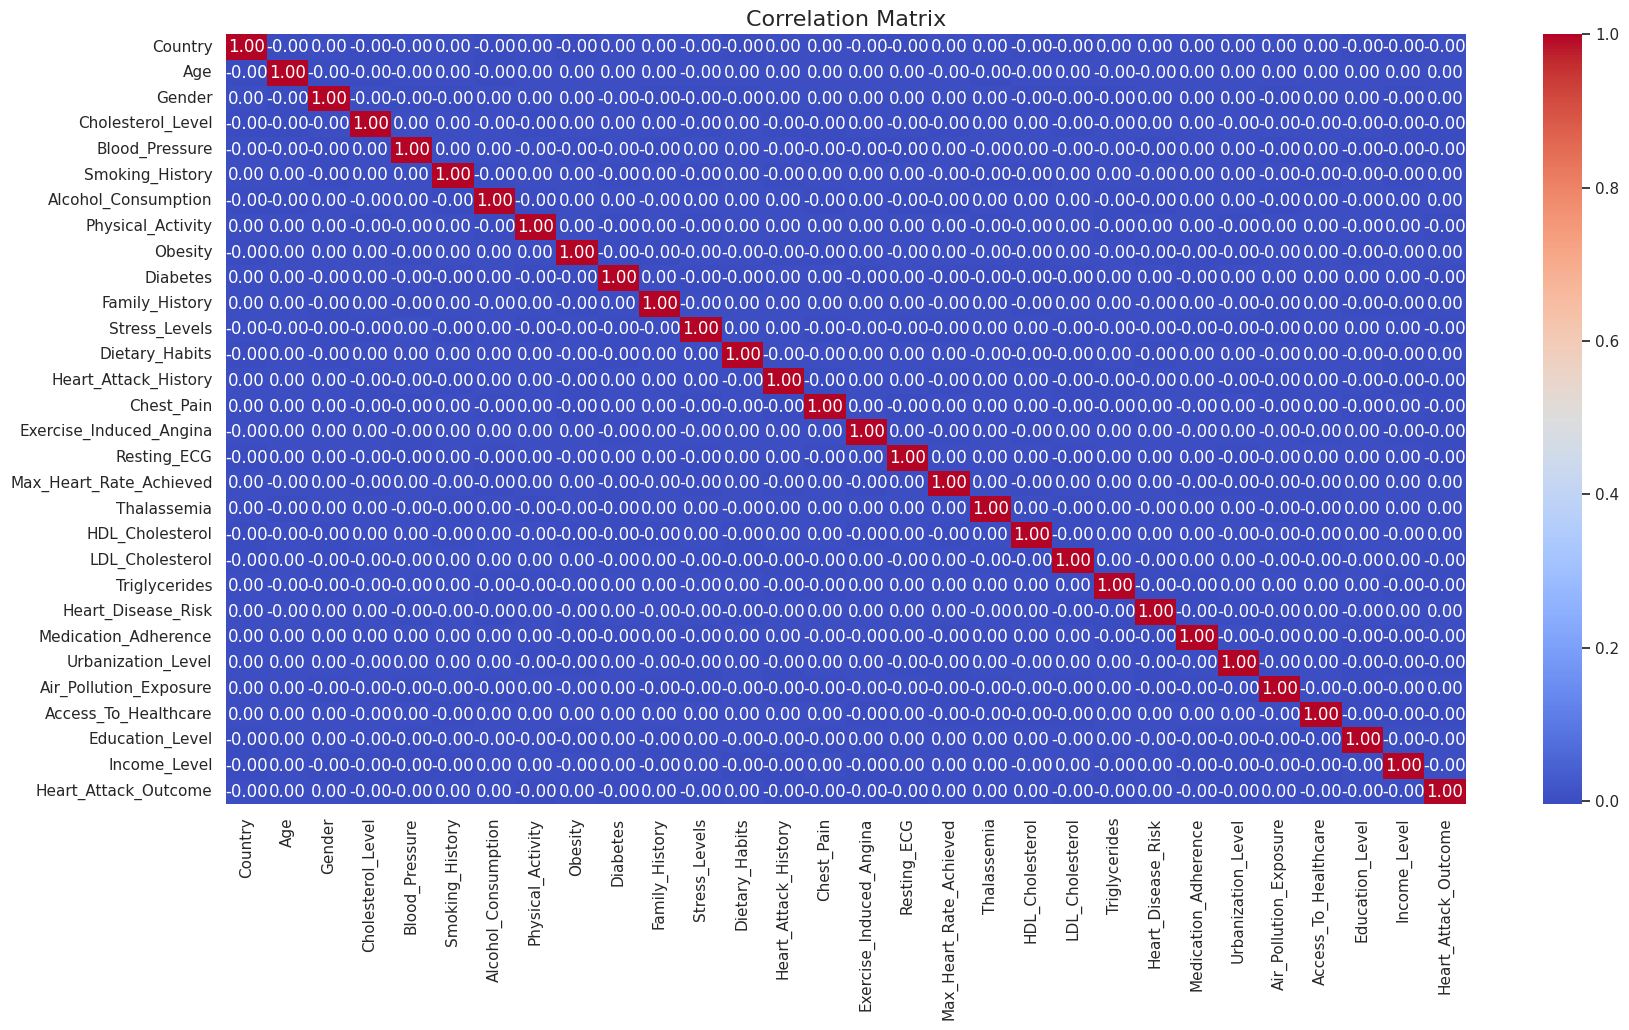

In [11]:
# Initialize label encoders and store them in a dictionary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Obesity', errors='ignore')

# Apply RobustScaler to numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Compute the correlation matrix after scaling and encoding
correlation_matrix = df.corr(method='pearson')

# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [12]:
X = df.drop('Heart_Attack_Outcome', axis=1)
y = df['Heart_Attack_Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [13]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.498692,0.498699,0.498692,0.498684
1,KNN,0.498876,0.499033,0.498876,0.465755
2,Decision Tree,0.498154,0.498156,0.498154,0.498154
3,XGBoost,0.498909,0.498917,0.498909,0.498899


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [14]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5006 - loss: 0.6940 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 2/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 3/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 4/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4988 - val_loss: 0.6932
Epoch 5/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 6/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 7/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 8/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

In [15]:
# ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  
    BatchNormalization(),                                           
    Dropout(0.3),                                                   
    Dense(64, activation='relu'),                                   
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')                                  
])

ann_model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='binary_crossentropy',          
    metrics=['accuracy']                
)

ann_model.summary()

history = ann_model.fit(
    X_train, y_train, 
    epochs=10,                 
    batch_size=32, 
    validation_split=0.2,       
    verbose=1
)

test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.4997 - loss: 0.7141 - val_accuracy: 0.4975 - val_loss: 0.6938
Epoch 2/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5014 - loss: 0.6938 - val_accuracy: 0.4991 - val_loss: 0.6934
Epoch 3/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4997 - loss: 0.6934 - val_accuracy: 0.4987 - val_loss: 0.6932
Epoch 4/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4998 - loss: 0.6933 - val_accuracy: 0.5001 - val_loss: 0.6931
Epoch 5/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5033 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 6/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 7/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6932
Epoch 8/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 

In [16]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.4992 - loss: 0.6944 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 2/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 3/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6931
Epoch 4/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 5/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 6/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 7/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 8/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

In [17]:
# CNN Model

X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 27, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 416)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          26,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,881 (105.00 KB)

 Trainable params: 26,881 (105.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5025 - loss: 0.6937 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 2/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 3/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5026 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 4/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5001 - val_loss: 0.6931
Epoch 5/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 6/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 7/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 8/10
12461/12461 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 

In [18]:
def evaluate_model_on_test(model, X_test, y_test):
    y_pred_prob = model.predict(X_test, verbose=0)
    
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "ANN": ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

for model_name, model in models_dict.items():
    if model_name == "CNN":  
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test_reshaped, y_test)
    else:
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)

results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.499205,0.249206,0.499205,0.332451
1,ANN,0.499013,0.497817,0.499013,0.452829
2,MLP,0.499205,0.249206,0.499205,0.332451
3,CNN,0.499205,0.249206,0.499205,0.332451


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model         XGBoost
Accuracy     0.498909
Precision    0.498917
Recall       0.498909
F1-Score     0.498899
Name: 3, dtype: object


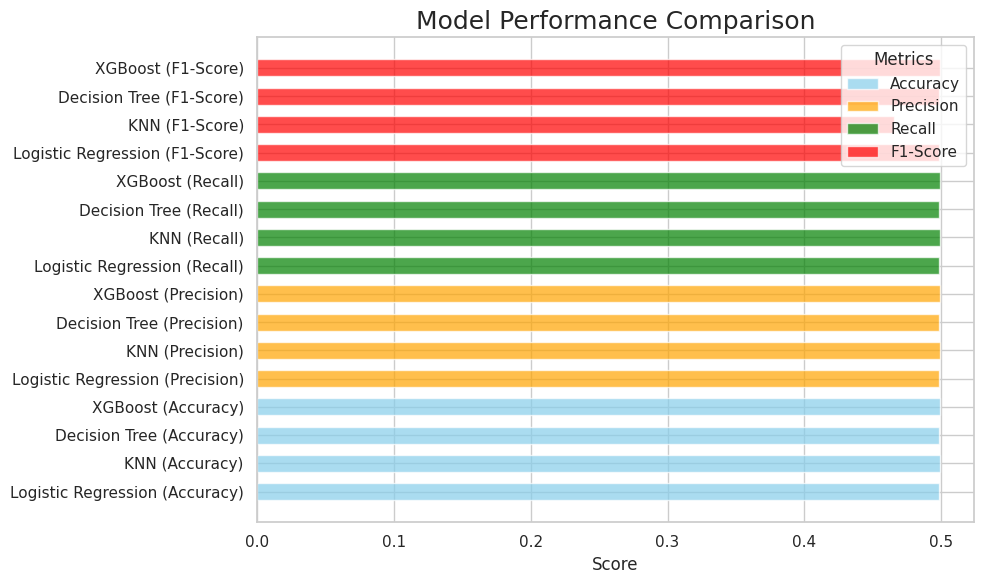


Optimal Model based on Accuracy: XGBoost with Accuracy = 0.4989


In [19]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Simple NN
Accuracy      0.499205
Precision     0.249206
Recall        0.499205
F1-Score      0.332451
Name: 0, dtype: object


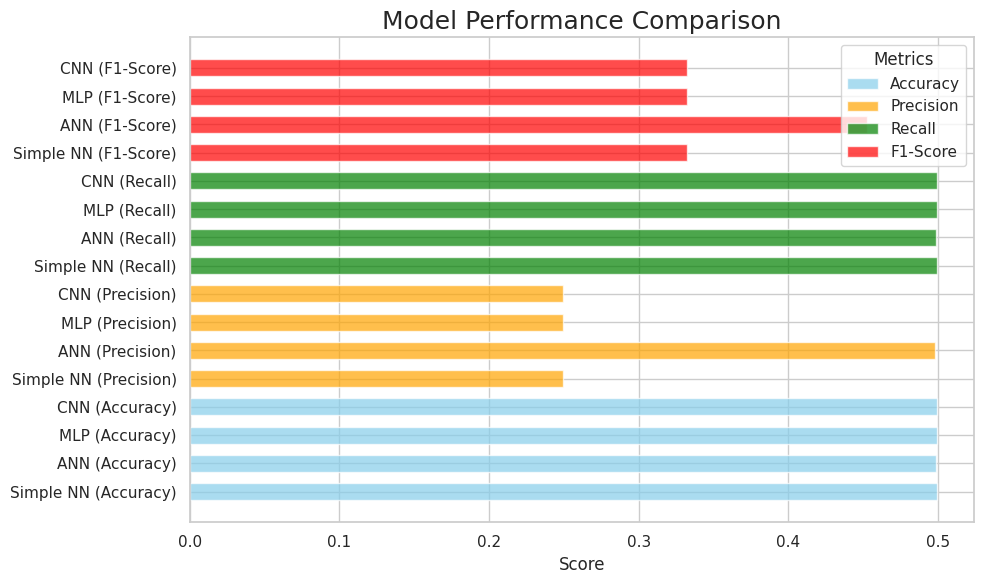


Optimal Model based on Accuracy: Simple NN with Accuracy = 0.4992


In [20]:
best_model2 = results_df2.loc[results_df2['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")


3894/3894 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


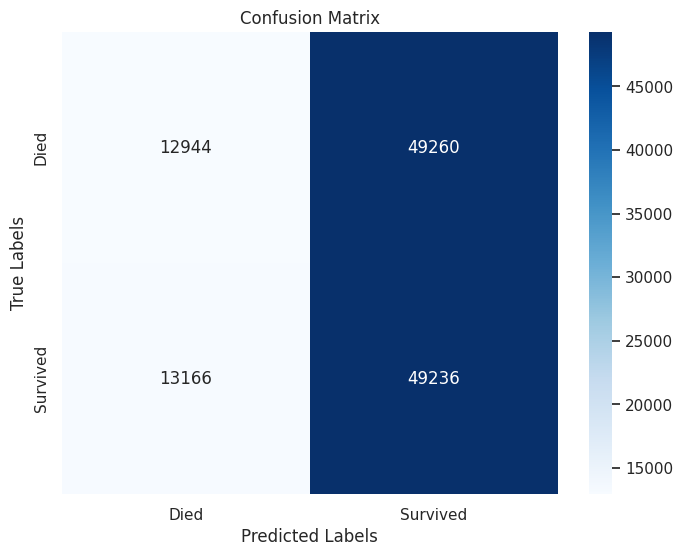


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.29     62204
         1.0       0.50      0.79      0.61     62402

    accuracy                           0.50    124606
   macro avg       0.50      0.50      0.45    124606
weighted avg       0.50      0.50      0.45    124606



In [21]:
y_pred_prob = ann_model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>